# **Models: Concepts, Strengths, Weaknesses and Use Cases**


## **Logistic Regression**

*   **What problem type is it for?**

    Logistic Regression is used for binary classification problems (e.g., yes/no, true/false).

*   **What assumptions does it make?**
    1. Categorical Output
      - The output (dependent variable) must be categorical (typically 0 or 1).

    2. Linear Relationship with Log-Odds
      - Instead of directly predicting a category, the model predicts something called log-odds (explained below), which should increase or decrease in a straight-line way with the input features.
      - 🔍 *Example:* As study hours(feature) increase, the chance of passing(label) increases steadily.

    3. Features are Independent
      - Features shouldn’t be highly correlated — each should give unique information.
      - 🔍 *Example:*  "Hours studied" and "Pages read" might overlap too much.

    4. Few or no extreme outliers
      - Logistic Regression is sensitive to outliers because they can heavily influence the coefficients and predictions.
      - 🔍 *Example:* One person studying 1000 hours (while most study 10–30) might throw off the model.
  

*   **How does it work conceptually?**
    - Takes input features and calculates a weighted sum
      - (Each feature is multiplied by a learned weight → then all are added up(and a bias term is added))
    - Applies the sigmoid function to map that sum to a probability between 0 and 1.
    - If the probability is > 0.5 → class = 1, else → class = 0.
    
*   **What are Log Odds?**

    Instead of predicting yes/no directly, logistic regression first calculates the odds of the outcome and then takes the log of those odds — which gives us the log-odds.

    Odds = probability of success / probability of failure

    Example:
    If the chance of passing is 0.8
    → Odds = 0.8 / (1 - 0.8) = 4 (4 to 1)
    → Log(4) ≈ 1.39 → this is what the model tries to predict linearly

    Then the sigmoid function takes the weighted sum (which the model interprets as log-odds).

    ```python
    import numpy as np

    def sigmoid(z):
        # Here, z represents the log-odds (i.e., the weighted sum of inputs)
        return 1 / (1 + np.exp(-z))

*   **Strengths**

    - Easy to implement and interpret.
    - Fast to train and requires few computational resources.
    - Provides probability estimates.
    - Performs well when data is linearly separable.
    - Interpretable coefficients: You can examine each feature’s weight to understand how it affects the prediction.
    - Good for a baseline model

*   **Weaknesses**

    - Doesn’t work well with non-linear data.
    - Assumes feature independence.
    - Sensitive to outliers.
    - Can underperform when classes are not well separated.

* **When to Use**

    - When you want a quick, interpretable model
    - When your data has a linear trend
    - When the problem is binary classification
    - When you need a baseline to compare more complex models

*  **When NOT to Use**

    - The relationship between features and the outcome is non-linear.
    - Features are strongly correlated.
    - When you are working with multi-class problems
(Unless using the extended version: Multinomial Logistic Regression in sklearn)

[[ 1.2349949  -0.73168763]
 [ 1.00459142 -1.05172286]
 [ 1.07746664 -0.9609536 ]
 [-0.00832267 -1.7576143 ]
 [ 0.09145925  0.19690952]
 [ 0.63356167 -1.17278867]
 [ 1.8073481   1.73476635]
 [ 2.33026777  2.25911758]
 [ 1.01215141 -0.95668044]
 [ 1.03307436 -0.85545993]
 [ 1.44537152 -0.74322936]
 [ 0.60046915 -1.43949185]
 [ 0.12437227  0.19896733]
 [ 0.47335819 -1.43862044]
 [ 0.85095512 -1.18455216]
 [ 1.71073996  1.56900774]
 [ 1.8669662  -0.36915809]
 [ 0.22485502  0.29482153]
 [ 0.80375081  0.74491926]
 [ 2.22140553  2.10036638]
 [ 3.07752729  2.90114736]
 [ 0.57357881 -1.35297943]
 [ 0.10320711  0.21791213]
 [ 0.76361798 -1.18691259]
 [ 1.32272135 -0.59340317]
 [-0.22595246 -0.14928517]
 [ 0.55656344 -1.31038476]
 [ 0.3808594  -1.57866861]
 [ 2.31414829  2.29519066]
 [ 0.01258051  0.12054434]
 [ 1.21530116 -0.96090774]
 [ 1.04031359  1.11434941]
 [ 0.78779153 -1.24378397]
 [ 1.23413512  1.20275034]
 [ 0.73254597  0.69041433]
 [ 0.77018374  0.74976134]
 [ 0.51142713 -1.28981425]
 

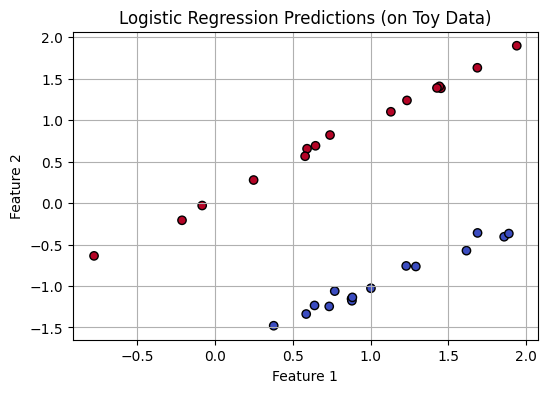

In [12]:
# Visual Demo (Toy Example)

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Generate simple 2D classification data
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_classes=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42
)

# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
# print(X_train)
# print("y_train: \n", y_train)
# print("X_test: \n",X_test)
# print("y_test:\n", y_test)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and print classification report
y_pred = model.predict(X_test)
print("y_test (actual):", y_test)
print("y_pred (predicted):", y_pred)

print(classification_report(y_test, y_pred))
# Plot predictions
plt.figure(figsize=(6, 4))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', edgecolors='k')
plt.title("Logistic Regression Predictions (on Toy Data)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


This plot visualizes the predictions made by a Logistic Regression model on a toy dataset with just two features (so we can plot it easily). Each point represents a test sample:

🔴 Red points: predicted as Class 1

🔵 Blue points: predicted as Class 0

You can see that the two classes are linearly separable, meaning a straight line (the decision boundary) can clearly split the two groups. Logistic Regression performs very well in such cases, assigning high confidence to each prediction.